In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate as I

# Analysis of the time evolution of the density matrix

We analyze some properties of the time evolution of the density matrix at the first and second order in the
intensity of the pump.

## One photon analysis

At the first order the dm contains only $cv$ non vanishing elements. The equation that governs its time evolution reads 
($k$ index is omitted):

$$
\partial_{t}\rho_{cv} = -i\Delta\epsilon_{cv}\rho_{cv} + i\Delta f_{cv}\mathbf{E}(t)\cdot\mathbf{d}_{cv}-\eta\rho_{cv}
$$

This equation can be rewritten as

$$
\partial_{t}\rho_{cv} + i\Omega\rho_{cv} = - iF_0(t)
$$

where $\Omega = \Delta\epsilon_{cv} - i\eta$ and $F_0(t)=\mathbf{E}(t)\cdot\mathbf{d}_{cv}$. The solution that satisfies the
_initial_ condition $\rho_{cv}(0)=0$ is

$$
\rho_{cv}(t) = -i e^{-i\Omega t} \int_{0}^{t}dt' e^{i\Omega t'}F_0(t')
$$



We want to show that in order to activate non negligible contribution to the $\rho_{cv}$ the frequency of the pump $\omega$ has to match
the condition $\omega \sim \Delta\epsilon_{cv}$. 

### Numerical analysis

We can numerically solve the eqm for $\rho_{cv}$. We set the values of the relevant parameters of the system and of
the pump

In [2]:
from mppi import Utilities as U

eta_ev = 0.004 # damping parameter in eV
delta_eps_ev = 1.42 # GaAs direct gap

# we convert these parameters in fs
hcut = U.Planck_ev_ps*1e3/(2*np.pi) # reduced Planck ev * fs

eta = eta_ev/hcut
omega0 = delta_eps_ev/hcut
print(eta,omega0)

0.006077069792872049 2.1573597764695776


In [34]:
sim_time = 500 # in fs
time = np.arange(0.,sim_time)

In [35]:
# pulse parameter
width = 40 #fs gives a FWHM of around 100 
energy = 1.45 #ev

In [36]:
# Define the function the return the value of the source term
def F0(t,width,energy):
    omega = energy/hcut
    t0 = 3*width
    return np.sin(omega*t)*np.exp(-0.5*((t-t0)/width)**2) 

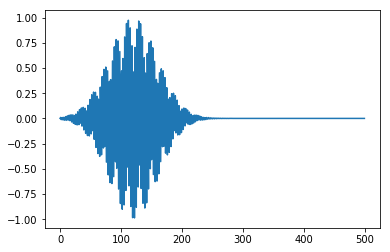

In [37]:
plt.plot(time,F0(time,width,energy))

We define a function that returns the integral (both real and imaginary parts) in function of time

In [38]:
def integrand(t,width,energy,omega0,eta):
    re = np.exp(eta*t)*np.cos(omega0*t)*F0(t,width,energy)
    im = np.exp(eta*t)*np.sin(omega0*t)*F0(t,width,energy)
    return re,im

def integral(time,width,energy,omega0,eta):
    re_inte = [0.]
    im_inte = [0.]
    for ind in range(1,len(time)):
        re_inte.append(I.simps(y=integrand(time[0:ind],width,energy,omega0,eta)[0],x=time[0:ind]))
        im_inte.append(I.simps(y=integrand(time[0:ind],width,energy,omega0,eta)[1],x=time[0:ind]))
    return np.array(re_inte),np.array(im_inte)

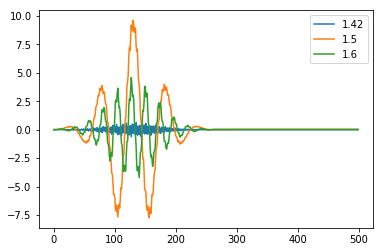

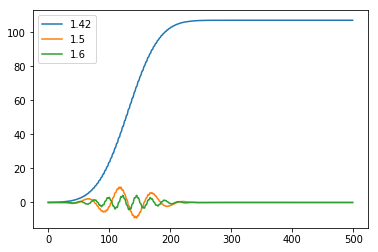

In [39]:
vals = [1.42,1.5,1.6]
for o in vals:
    plt.plot(time,integral(time,width,o,omega0,eta)[0],label=str(o))
plt.legend()
plt.show()
for o in vals:
    plt.plot(time,integral(time,width,o,omega0,eta)[1],label=str(o))
plt.legend()

We reconstruct the complete one photon dm

In [40]:
def rho1(time,width,energy,omega0,eta):
    re_inte, im_inte = integral(time,width,energy,omega0,eta)
    # we keep into account the factor -i
    rho_re = np.exp(-eta*time)*(np.cos(omega0*time)*im_inte - np.sin(omega0*time)*re_inte)
    rho_im = -np.exp(-eta*time)*(np.cos(omega0*time)*re_inte + np.sin(omega0*time)*im_inte)
    return rho_re, rho_im    

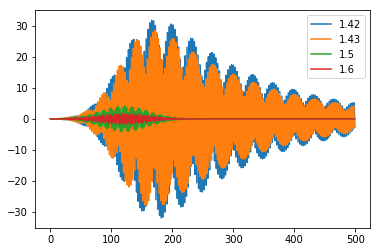

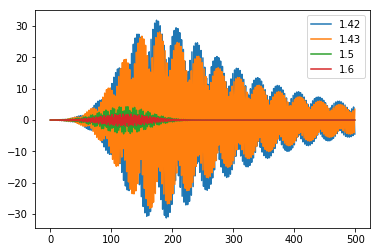

In [41]:
vals = [1.42,1.43,1.5,1.6]
for o in vals:
    plt.plot(time,rho1(time,width,o,omega0,eta)[0],label=str(o))
plt.legend()
plt.show()
for o in vals:
    plt.plot(time,rho1(time,width,o,omega0,eta)[1],label=str(o))
plt.legend()

Only for pulse energy very close to $\omega_0$ the dm has relevant contribution with long time behavior
controlled by the value of $\eta$.

It should be interesting to derive these properties also looking at the formal structure of the integral.

It is interesting to analyze which is frequence of the oscillation of the dm

In [57]:
# omega of the pump
e = 1.35
omega_pump = e/hcut
print(omega_pump)

2.051011055094317


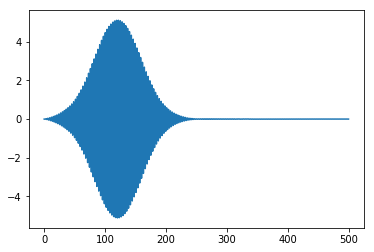

In [58]:
t_hires = np.arange(0.,500,0.01)
rr = rho1(t_hires,width,e,omega0,eta)[0]
#rr = np.cos(omega0*t_hires)
plt.plot(t_hires,rr)
#plt.vlines(2.912,-1,1)
#plt.vlines(5.825,-1,1)

In [59]:
from scipy.signal import argrelextrema
t_max = t_hires[argrelextrema(rr, np.greater)[0]]

In [60]:
omegas = []
for ind in range(len(t_max)-1):
    omegas.append(2*np.pi/(t_max[ind+1]-t_max[ind]))

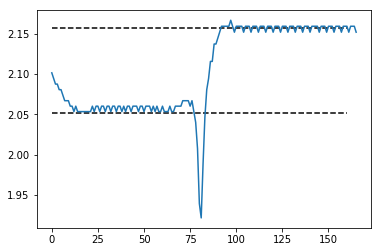

In [61]:
plt.plot(omegas)
plt.hlines(omega0,0,160,linestyles='--')
plt.hlines(omega_pump,0,160,linestyles='--')

We observe that during the pump rho oscillates with the frequency of the pump while for longer times it oscillates with the
proper frequency of the transitions. 

## Two photon analysis

We analyze the equation of the $\rho_{cc'}$ components at the second order in the pulse intensity. 

The equation has the same structure of the one at the first order, that is:

This equation can be rewritten as

$$
\partial_{t}\rho_{cc'} + i\Omega\rho_{cc'} = - iF_1(t)
$$

but in this case $\Omega = \Delta\epsilon_{cc'} - i\eta$ and the source term is given by

$$
F_1(t) = \mathbf{E}(t)\cdot \sum_{v}(\mathbf{d}_{cv}\rho^{(1)}_{vc'}-\mathbf{d}_{vc'}\rho^{(1)}_{cv})
$$

### Analysis of the diagonal elements

Let us consider the presence of a single valence band and we analyze the diagonal component of the dm.

In this case $\Omega=0$ since the dephasing parameters is set to zero for the diagonal components of the dm.
The eqm becomes

$$
\partial_{t}\rho_{cc} = - iF_1(t)
$$

where the source term can be written as

$$
F_1(t) = \mathbf{E}(t)\cdot\left( (\mathbf{d}_{vc}\rho^{(1)}_{cv})^*-
\mathbf{d}_{vc}\rho^{(1)}_{cv}
\right) = -2i Im(F_0(t)\rho^{(1)}_{cv})
$$

so that

$$
\partial_{t}\rho_{cc} = -2Im(F_0(t)\rho^{(1)}_{cv})
$$

we observe that it is a _real_ equation without oscillatory term that can be directly integrated.

In [14]:
def F1(t,width,energy,omega0,eta):
    re_rho1,im_rho1 = rho1(t,width,energy,omega0,eta)
    return -2.*F0(t,width,energy)*im_rho1

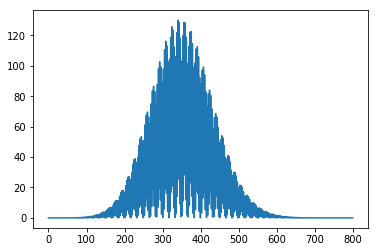

In [49]:
plt.plot(time,F1(time,width,energy,omega0,eta))

In [17]:
def rho2(time,width,energy,omega0,eta):
    f1 = F1(time,width,energy,omega0,eta)
    inte = [0.]
    for ind in range(1,len(time)):
        inte.append(I.simps(y=f1[0:ind],x=time[0:ind]))
    return np.array(inte)

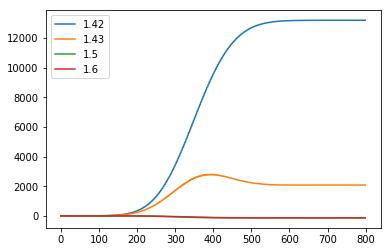

In [18]:
vals = [1.42,1.43,1.5,1.6]
for o in vals:
    plt.plot(time,rho2(time,width,o,omega0,eta),label=str(o))
plt.legend()

This plot describes the dynamics of the carriers

### Analysis of the off-diagonal elements

In this case considering the presence of a single valence band we can write the source term as

$$
F_1(t) = \mathbf{E}(t)\cdot\left( (\mathbf{d}_{vc}\rho^{(1)}_{c'v})^*-
\mathbf{d}_{vc'}\rho^{(1)}_{cv}
\right) 
$$

Assuming that $\mathbf{d}_{vc}=\mathbf{d}_{vc'}$ we can absorb the dipoles in the definition $F_0$ and we have that

$$
F_1(t) = (F_0(t)\rho^{(1)}_{c'v})^*-F_0(t)\rho^{(1)}_{cv}
$$

We can show with a numerical example that $F_1(t)$ contains slow oscillating behaviour with the frequency of the 
energy difference between $c$ and $c'$ states. 

In [131]:
delta_ccp = 0.004 # eV
eta_red = 0.0005
t_long = np.arange(0.,4000)
r1_cv = rho1(t_long,width,energy,omega0,eta_red)
r1_cpv = rho1(t_long,width,energy,omega0+delta_ccp/hcut,eta_red)

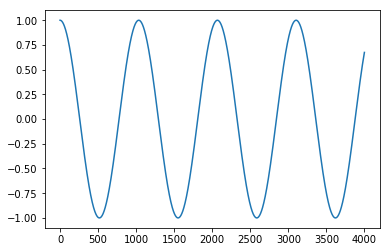

In [132]:
plt.plot(t_long,np.cos(delta_ccp/hcut*t_long))

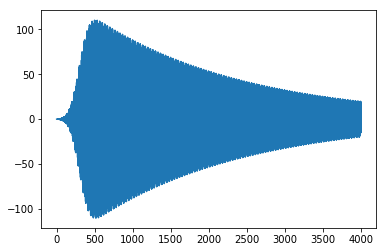

In [133]:
plt.plot(t_long,r1_cv[0])

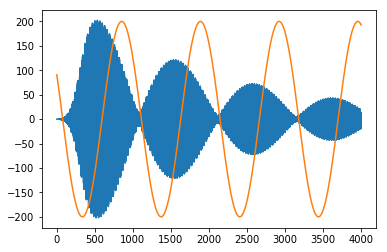

In [142]:
plt.plot(t_long,r1_cv[0]-r1_cpv[1])
plt.plot(t_long,200*np.cos(delta_ccp/hcut*t_long+1.1))

This term acts as a source and activates the $\rho^{(2)}_{cc'}$ elements exactly like the $F_0(t)$ term did for the first 
order dm. Performing exactly the same analysis discussed previously we can conclude that the $\rho^{(2)}_{cc'}$ oscillates
with frequency $\Delta\epsilon_{cc'}$ and is damped by the $\eta$ dephasing parameter

The last question that we can try to address regards the possible dephasing associated to the various kpoints.

We can ask if a different kpoint that has a slightly different $\Delta\epsilon_{cv}$ produces a source term for the $\rho^{(2)}_{cc'}$
that is dephased (or not) with respect to this one.

In [150]:
delta_Ekpoint = 0.01 # eV
delta_ccp = 0.004 # eV
eta_red = 0.0005
t_long = np.arange(0.,4000)
r1_cv_delta = rho1(t_long,width,energy,omega0+delta_Ekpoint/hcut,eta_red)
r1_cpv_delta = rho1(t_long,width,energy,omega0+delta_Ekpoint/hcut+delta_ccp/hcut,eta_red)

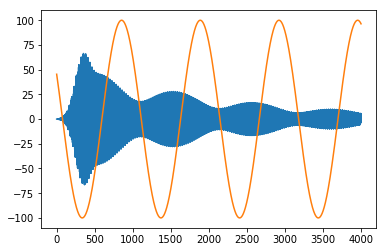

In [152]:
plt.plot(t_long,r1_cv_delta[0]-r1_cpv_delta[1])
plt.plot(t_long,100*np.cos(delta_ccp/hcut*t_long+1.1))

It seems that there is NO dephasing!